# Context

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

Content

The happiness scores and rankings use data from the Gallup World Poll. The scores are based on answers to the main life evaluation question asked in the poll. This question, known as the Cantril ladder, asks respondents to think of a ladder with the best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives on that scale. The scores are from nationally representative samples for the years 2013-2016 and use the Gallup weights to make the estimates representative. The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.

What is Dystopia?

Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

What are the residuals?

The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?

The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.

The Dystopia Residual is already provided in the dataset. 

If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.

You need to predict the happiness score considering all the other factors mentioned in the dataset. 

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("happiness_score.csv")

In [3]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [5]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
lencode = LabelEncoder()
df["Country"] = lencode.fit_transform(df["Country"])
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,118,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [8]:
len = LabelEncoder()
df["Region"] = len.fit_transform(df["Region"])
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,118,8,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136,4,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21,8,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [9]:
import seaborn as sns

<AxesSubplot:xlabel='Standard Error', ylabel='Density'>

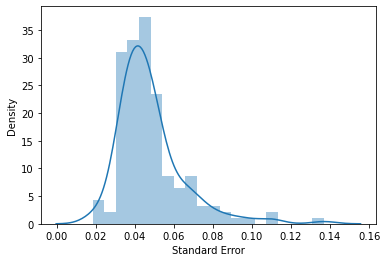

In [10]:
sns.distplot(df["Standard Error"],bins = 20)

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Density'>

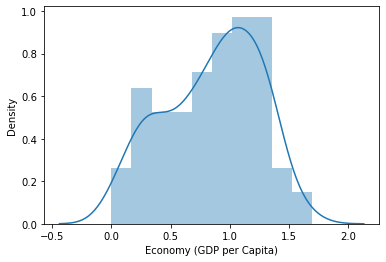

In [11]:
sns.distplot(df["Economy (GDP per Capita)"],bins = 10)

<AxesSubplot:xlabel='Family', ylabel='Density'>

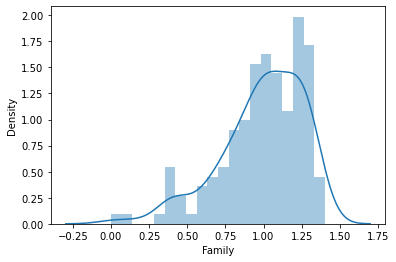

In [12]:
sns.distplot(df["Family"],bins = 20)

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Density'>

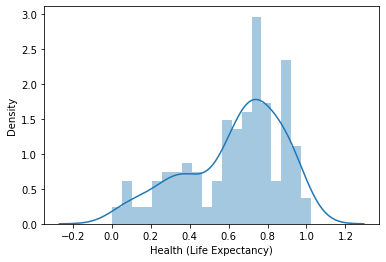

In [13]:
sns.distplot(df["Health (Life Expectancy)"],bins = 20)

<AxesSubplot:xlabel='Freedom', ylabel='Density'>

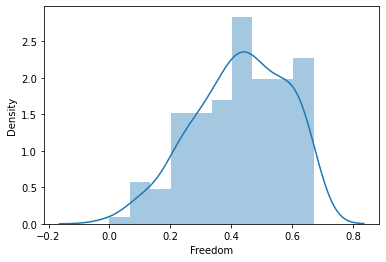

In [14]:
sns.distplot(df["Freedom"],bins = 10)

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Density'>

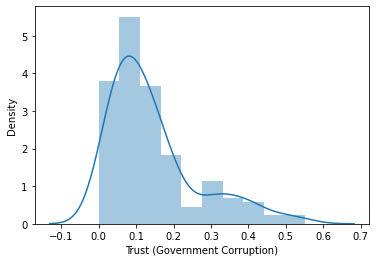

In [15]:
sns.distplot(df["Trust (Government Corruption)"],bins = 10)

<AxesSubplot:xlabel='Generosity', ylabel='Density'>

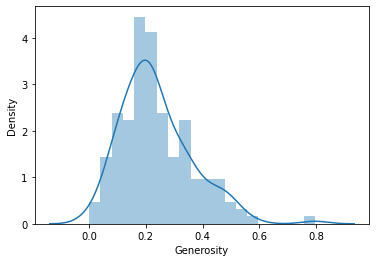

In [16]:
sns.distplot(df["Generosity"],bins = 20)

<AxesSubplot:xlabel='Standard Error', ylabel='Happiness Score'>

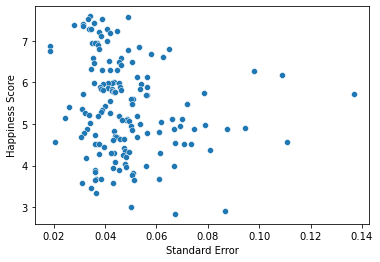

In [17]:
sns.scatterplot(x = "Standard Error",y = "Happiness Score",data = df)

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Happiness Score'>

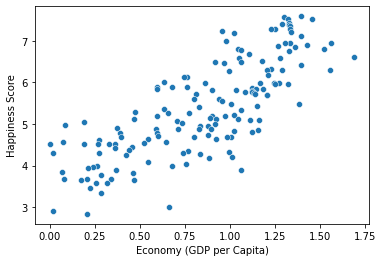

In [18]:
sns.scatterplot(x = "Economy (GDP per Capita)",y = "Happiness Score",data = df)

<AxesSubplot:xlabel='Family', ylabel='Happiness Score'>

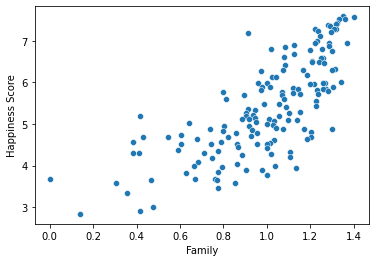

In [19]:
sns.scatterplot(x = "Family",y= "Happiness Score",data = df )

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Happiness Score'>

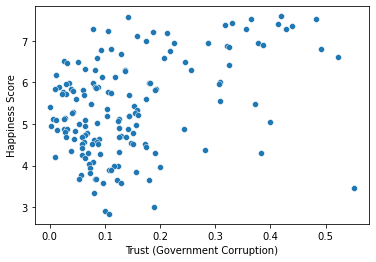

In [20]:
sns.scatterplot (x = "Trust (Government Corruption)",y = "Happiness Score",data = df)

<AxesSubplot:xlabel='Generosity', ylabel='Happiness Score'>

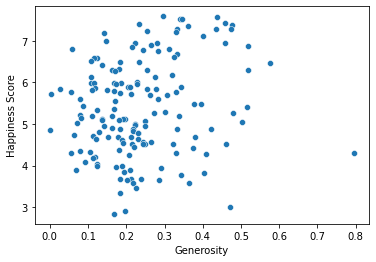

In [21]:
sns.scatterplot(x ="Generosity",y = "Happiness Score",data = df)

In [22]:
df1 = df.iloc[:,2:]
df1

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
153,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [23]:
df1.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


<AxesSubplot:>

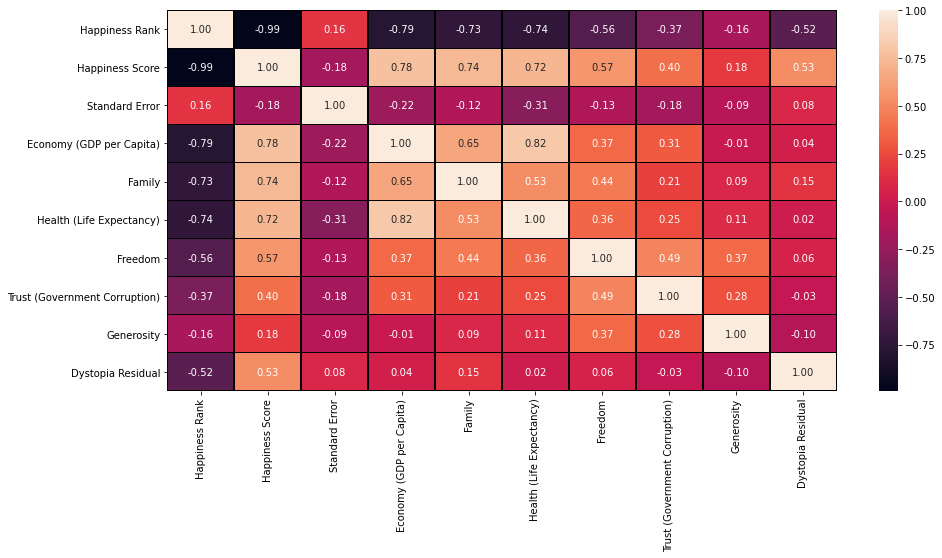

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,7))
sns.heatmap(df1.corr(),annot = True, linewidths = 0.5,linecolor = "black",fmt =".2f")

# Outcome of correlation 

some columns in dataset are positively and some are negatively correlated
StandardError has -18 percent correlation with target column Happiness Score which can be considered has weak bond.Economy(GDP per Captia) has 78 percent correlation with target column Happiness Score which can be considered has strong bond.Family has 74 percent correlation with target column Happiness Score which can be considered has strong bond.Health(Life Expectancy) has 72 percent correlation with target column Happiness Score which can be considered has strong bond.Freedom has 57 percent correlation with target column Happiness Score which can be considered has good bond.Trust(Government Corruption) has 40 percent correlation with target column Happiness Score which can considered has weak bond.Generosity has 18 percent correlation with target column Happiness Score which can be considered has weak bond.Dystopia Residual has 53 percent correlation with target column Happiness Score which can be considered has good bond

Maximum correlation  = Economy(GDP per Capita)
Minmum correlation = Happiness Rank
    

# Describing Datasets

In [25]:
df1.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


# outliers Checking:

Country                             AxesSubplot(0.125,0.657941;0.0945122x0.222059)
Region                           AxesSubplot(0.238415,0.657941;0.0945122x0.222059)
Happiness Rank                   AxesSubplot(0.351829,0.657941;0.0945122x0.222059)
Happiness Score                  AxesSubplot(0.465244,0.657941;0.0945122x0.222059)
Standard Error                   AxesSubplot(0.578659,0.657941;0.0945122x0.222059)
Economy (GDP per Capita)         AxesSubplot(0.692073,0.657941;0.0945122x0.222059)
Family                           AxesSubplot(0.805488,0.657941;0.0945122x0.222059)
Health (Life Expectancy)            AxesSubplot(0.125,0.391471;0.0945122x0.222059)
Freedom                          AxesSubplot(0.238415,0.391471;0.0945122x0.222059)
Trust (Government Corruption)    AxesSubplot(0.351829,0.391471;0.0945122x0.222059)
Generosity                       AxesSubplot(0.465244,0.391471;0.0945122x0.222059)
Dystopia Residual                AxesSubplot(0.578659,0.391471;0.0945122x0.222059)
dtyp

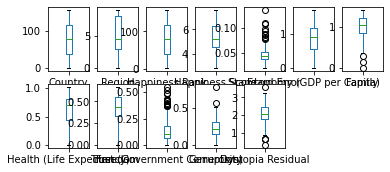

In [26]:
df.plot(kind = "box",subplots = True,layout = (3,7))

{'whiskers': [<matplotlib.lines.Line2D at 0x22fbab9e070>,
 'caps': [<matplotlib.lines.Line2D at 0x22fbab9e730>,
 'boxes': [<matplotlib.lines.Line2D at 0x22fbab91cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x22fbab9edf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22fbabab190>],
 'means': []}

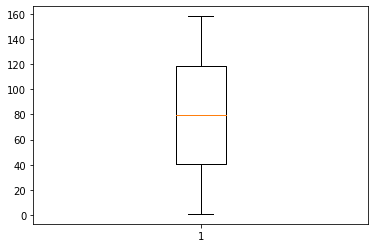

In [27]:
plt.boxplot(df1["Happiness Rank"])

{'whiskers': [<matplotlib.lines.Line2D at 0x22fbabff610>,
 'caps': [<matplotlib.lines.Line2D at 0x22fbabffcd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22fbabff2b0>],
 'medians': [<matplotlib.lines.Line2D at 0x22fbac0a3d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22fbac0a730>],
 'means': []}

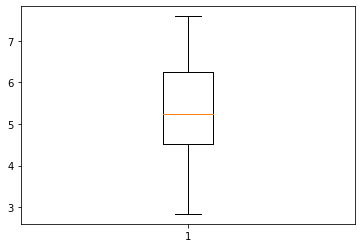

In [28]:
plt.boxplot(df1["Happiness Score"])

{'whiskers': [<matplotlib.lines.Line2D at 0x22fbac566a0>,
 'caps': [<matplotlib.lines.Line2D at 0x22fbac56d60>,
 'boxes': [<matplotlib.lines.Line2D at 0x22fbac56340>],
 'medians': [<matplotlib.lines.Line2D at 0x22fbac60490>],
 'fliers': [<matplotlib.lines.Line2D at 0x22fbac607f0>],
 'means': []}

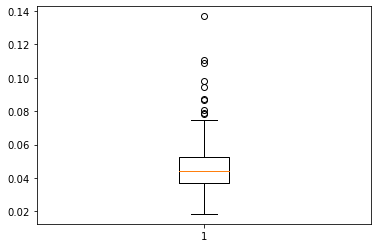

In [29]:
plt.boxplot(df1["Standard Error"])

{'whiskers': [<matplotlib.lines.Line2D at 0x22fbacb91f0>,
 'caps': [<matplotlib.lines.Line2D at 0x22fbacb98b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22fbaca9e50>],
 'medians': [<matplotlib.lines.Line2D at 0x22fbacb9f70>],
 'fliers': [<matplotlib.lines.Line2D at 0x22fbacc4310>],
 'means': []}

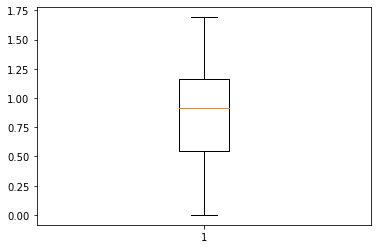

In [30]:
plt.boxplot(df1["Economy (GDP per Capita)"])

{'whiskers': [<matplotlib.lines.Line2D at 0x22fbad1a250>,
 'caps': [<matplotlib.lines.Line2D at 0x22fbad1a910>,
 'boxes': [<matplotlib.lines.Line2D at 0x22fbad0deb0>],
 'medians': [<matplotlib.lines.Line2D at 0x22fbad1afd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22fbad24370>],
 'means': []}

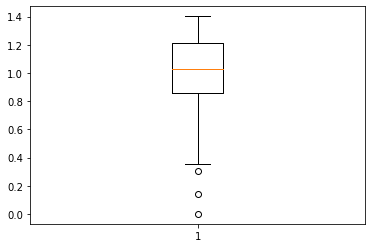

In [31]:
plt.boxplot(df1["Family"])

{'whiskers': [<matplotlib.lines.Line2D at 0x22fbad792e0>,
 'caps': [<matplotlib.lines.Line2D at 0x22fbad799a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22fbad6cf40>],
 'medians': [<matplotlib.lines.Line2D at 0x22fbad850a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22fbad85400>],
 'means': []}

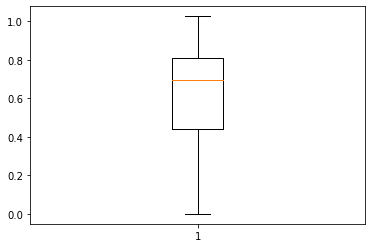

In [32]:
plt.boxplot(df1["Health (Life Expectancy)"])

{'whiskers': [<matplotlib.lines.Line2D at 0x22fbadc9d90>,
 'caps': [<matplotlib.lines.Line2D at 0x22fbadd9490>,
 'boxes': [<matplotlib.lines.Line2D at 0x22fbadc9a30>],
 'medians': [<matplotlib.lines.Line2D at 0x22fbadd9b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x22fbadd9eb0>],
 'means': []}

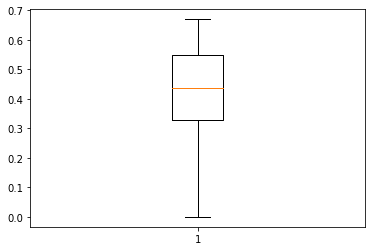

In [33]:
plt.boxplot(df1["Freedom"])

{'whiskers': [<matplotlib.lines.Line2D at 0x22fbae33310>,
 'caps': [<matplotlib.lines.Line2D at 0x22fbae339d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22fbae25f70>],
 'medians': [<matplotlib.lines.Line2D at 0x22fbae400d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22fbae40430>],
 'means': []}

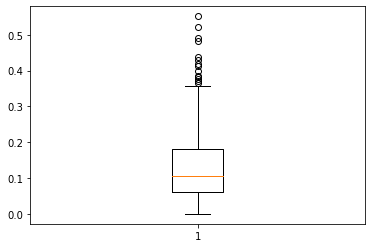

In [34]:
plt.boxplot(df1["Trust (Government Corruption)"])

{'whiskers': [<matplotlib.lines.Line2D at 0x22fbae83eb0>,
 'caps': [<matplotlib.lines.Line2D at 0x22fbae925b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22fbae83b50>],
 'medians': [<matplotlib.lines.Line2D at 0x22fbae92c70>],
 'fliers': [<matplotlib.lines.Line2D at 0x22fbae92fd0>],
 'means': []}

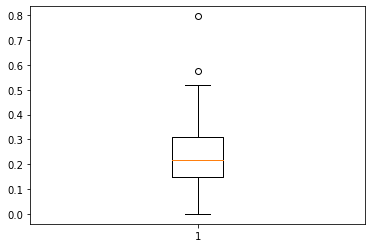

In [35]:
plt.boxplot(df["Generosity"])

{'whiskers': [<matplotlib.lines.Line2D at 0x22fbaeeb8e0>,
 'caps': [<matplotlib.lines.Line2D at 0x22fbaeebfa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22fbaeeb580>],
 'medians': [<matplotlib.lines.Line2D at 0x22fbaef96a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22fbaef9a00>],
 'means': []}

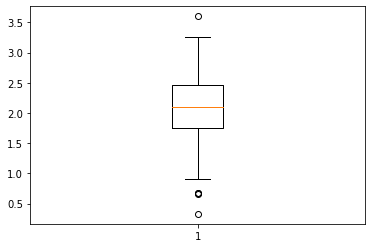

In [36]:
plt.boxplot(df["Dystopia Residual"])

In [37]:
df1.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

# Removing outliers :
Z-score Technique:

In [38]:
from scipy.stats import zscore
import numpy as np
z = np.abs(zscore(df1))
z.shape

(158, 10)

In [39]:
threshold = 3
print(np.where(z>3))

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64), array([7, 2, 2, 2, 8, 4, 7, 9, 4], dtype=int64))


In [40]:
df_new = df1[(z<3).all(axis= 1)]
print(df1.shape)
print(df_new.shape)

(158, 10)
(149, 10)


# percentage data loss:

In [41]:
loss_percent =(158-149)/158*100
print(loss_percent)

5.69620253164557


In [42]:
x = df_new.iloc[:,-8:]
y = df_new.iloc[:,-9]

# Transforming data to remove Skewness:
    

In [43]:
from sklearn.preprocessing import power_transform
x = power_transform (x,method = "yeo-johnson")

In [44]:
x

array([[-0.95033703,  1.49245411,  1.65888018, ...,  1.81762512,
         0.65957854,  0.75525527],
       [ 0.37856182,  1.19406711,  2.009125  , ...,  0.32967609,
         1.56260401,  1.11116834],
       [-1.04140135,  1.26661161,  1.73078531, ...,  1.95339954,
         0.97722591,  0.70649452],
       ...,
       [-1.32081011, -1.36521585, -2.08738872, ..., -0.19284338,
         1.13425805, -0.32711524],
       [-0.69272644, -1.43304072, -2.01044288, ..., -0.4344978 ,
        -0.31207994, -0.93216364],
       [ 2.17876604, -1.93874732, -1.9064101 , ..., -0.14727362,
        -0.17248609, -0.55359235]])

In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-0.95033703,  1.49245411,  1.65888018, ...,  1.81762512,
         0.65957854,  0.75525527],
       [ 0.37856182,  1.19406711,  2.009125  , ...,  0.32967609,
         1.56260401,  1.11116834],
       [-1.04140135,  1.26661161,  1.73078531, ...,  1.95339954,
         0.97722591,  0.70649452],
       ...,
       [-1.32081011, -1.36521585, -2.08738872, ..., -0.19284338,
         1.13425805, -0.32711524],
       [-0.69272644, -1.43304072, -2.01044288, ..., -0.4344978 ,
        -0.31207994, -0.93216364],
       [ 2.17876604, -1.93874732, -1.9064101 , ..., -0.14727362,
        -0.17248609, -0.55359235]])

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [47]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = .33,random_state = 45)


In [48]:
xtrain.shape

(99, 8)

In [49]:
ytrain.shape

(99,)

In [50]:
xtest.shape

(50, 8)

In [51]:
ytest.shape

(50,)

In [52]:
lm = LinearRegression()


In [53]:
lm.fit(xtrain,ytrain)

LinearRegression()

In [54]:
lm.coef_

array([0.00069966, 0.37927814, 0.26004435, 0.27494554, 0.16421126,
       0.06060461, 0.09774764, 0.50688655])

In [55]:
lm.intercept_

5.432801735079986

In [56]:
pred = lm.predict(xtest)
print("Predicted outcome",pred)
print("Actual outcome",ytest)

Predicted outcome [7.67928974 6.20249736 4.24273758 7.60940398 6.55326031 6.08980644
 6.1928572  4.49002934 4.31065953 3.8640367  6.61017113 3.91363369
 4.61248333 4.71395737 4.02735124 6.39460326 3.67501124 3.71007525
 6.04962668 4.76307945 5.21260106 5.08686508 4.39551229 5.82442761
 7.46138774 4.58811063 4.94927203 5.48242934 7.36303381 5.05345484
 5.09972097 4.72688538 3.83386667 4.85235006 6.9045581  3.86580655
 7.10268259 6.6652688  5.20960997 6.49256105 6.28770712 5.08061348
 7.7967142  6.02779386 4.92240517 6.79138177 4.02846498 5.79041536
 4.67623943 6.33574778]
Actual outcome 0      7.587
45     5.987
133    4.218
3      7.522
35     6.329
46     5.984
39     6.269
117    4.550
126    4.350
144    3.819
29     6.574
139    3.956
116    4.565
105    4.786
137    3.995
36     6.302
150    3.655
146    3.681
42     6.123
90     5.057
87     5.102
88     5.098
118    4.518
53     5.855
4      7.427
114    4.610
94     4.959
67     5.605
10     7.278
93     4.971
79     5.212
106 

In [57]:
print('error:')
print("Mean absolute error:",mean_absolute_error(ytest,pred))
print("Mean squared error",mean_squared_error(ytest,pred))

print("Root Mean Squared Error :",np.sqrt(mean_squared_error(ytest,pred)) )

error:
Mean absolute error: 0.07574464611247304
Mean squared error 0.009757512573206444
Root Mean Squared Error : 0.09878012235873392


In [58]:
from sklearn.metrics import r2_score
print(r2_score(ytest,pred))

0.992553788455218


In [71]:
from sklearn.model_selection import cross_val_score

score  = cross_val_score(lm,x,y,cv = 3)
print(score)
print(score.mean())
print(score.std())

[0.9065389  0.92652634 0.8213765 ]
0.8848139143944939
0.0455931513980754


# Model Saving

In [73]:
import pickle
filename = 'picklelmfile.pk'
pickle.dump(lm, open(filename, 'wb'))

loaded_model = pickle.load(open(filename,'rb'))f

loaded_model.predict(xtest)

array([7.67928974, 6.20249736, 4.24273758, 7.60940398, 6.55326031,
       6.08980644, 6.1928572 , 4.49002934, 4.31065953, 3.8640367 ,
       6.61017113, 3.91363369, 4.61248333, 4.71395737, 4.02735124,
       6.39460326, 3.67501124, 3.71007525, 6.04962668, 4.76307945,
       5.21260106, 5.08686508, 4.39551229, 5.82442761, 7.46138774,
       4.58811063, 4.94927203, 5.48242934, 7.36303381, 5.05345484,
       5.09972097, 4.72688538, 3.83386667, 4.85235006, 6.9045581 ,
       3.86580655, 7.10268259, 6.6652688 , 5.20960997, 6.49256105,
       6.28770712, 5.08061348, 7.7967142 , 6.02779386, 4.92240517,
       6.79138177, 4.02846498, 5.79041536, 4.67623943, 6.33574778])

# Conclusion:

In [75]:
p = np.array(ytest)
predicted = np.array(lm.predict(xtest))
df_happiness= pd.DataFrame({"Original":p,"predict":predicted})
df_happiness

,Original,predict
0,7.587,7.679290
1,5.987,6.202497
2,4.218,4.242738
3,7.522,7.609404
4,6.329,6.553260
5,5.984,6.089806
6,6.269,6.192857
7,4.550,4.490029
8,4.350,4.310660
9,3.819,3.864037
